# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('./Profissão- Cientista de Dados_M10_support material.csv')

In [4]:
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

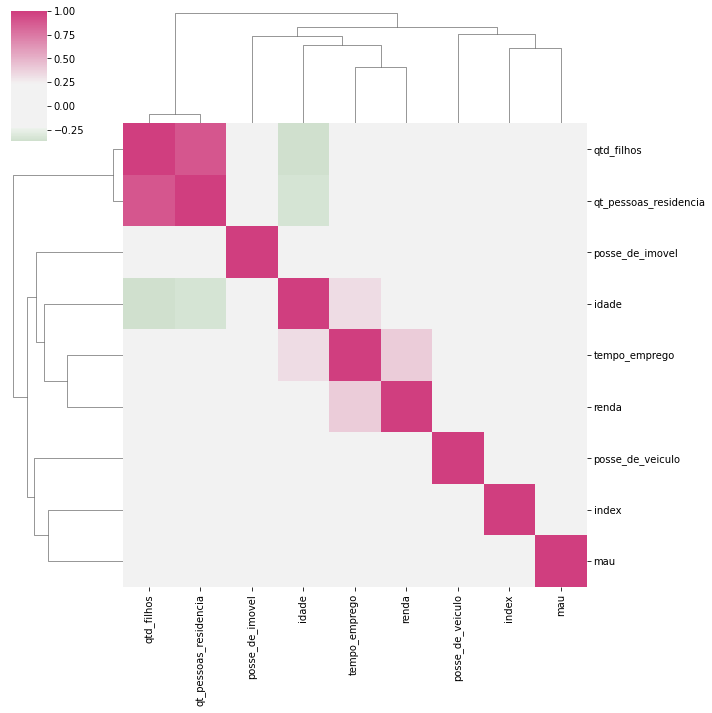

In [6]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df.corr(), figsize=(10, 10), center = 0, cmap=cmap)

Quantidade de filhos e quantidade de pessoas em casa possui relação forte entre si, assim como tempo de emprego e idade possui relação com a renda

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

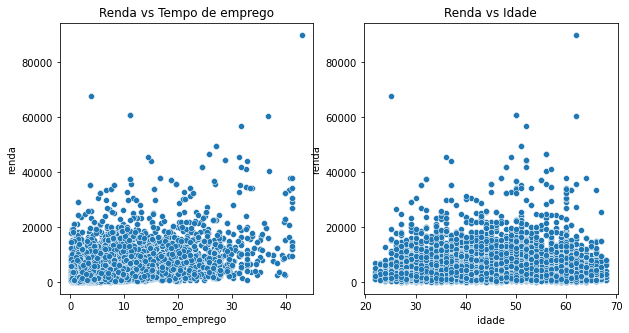

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

sns.scatterplot(data=df, x='tempo_emprego', y='renda', ax=ax1)


sns.scatterplot(data=df, x='idade', y='renda', ax=ax2)


ax1.set(title='Renda vs Tempo de emprego', xlabel='tempo_emprego', ylabel='renda')
ax2.set(title='Renda vs Idade', xlabel='idade', ylabel='renda')

plt.show()


3) Na su aopinião, há outliers na variável renda?

Sim, Em renda vs tempo de emprego por exemplo possui pessoas com pouco tempo de emprego que possuem uma renda bem alta, o que contraria a tendência exposta no gráfico que diz que quanto mais tempo de emprego maior a renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [12]:
df['log_renda'] = np.log(df['renda'])

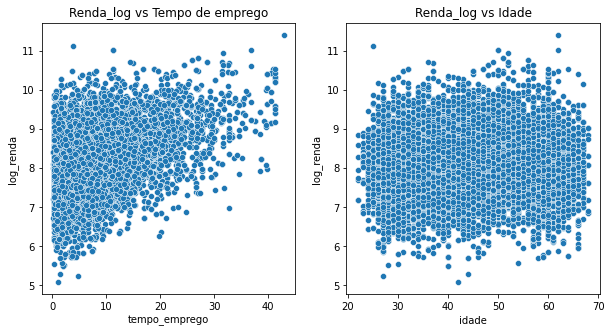

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
sns.scatterplot(data=df, x='tempo_emprego', y='log_renda', ax=ax1)


sns.scatterplot(data=df, x='idade', y='log_renda', ax=ax2)


ax1.set(title='Renda_log vs Tempo de emprego', xlabel='tempo_emprego', ylabel='log_renda')
ax2.set(title='Renda_log vs Idade', xlabel='idade', ylabel='log_renda')

plt.show()


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Piorou pois passa a ideia errada da relação de comportamento entre as variáveis. Como é possível observar no plot1 a relação entre as variáveis é positiva, ou seja, quanto maior a idade e o tempo de emprego, maior a renda. Porém, quando olhamos para o plot2 a relação se inverte. 